In [39]:
import json
import pandas as pd
import requests
from datetime import datetime
start_time = "2017-01-01"
end_time = "2017-06-30"
latitude = 21.00000
longitude = 78.000000
max_radius = 100
min_magnitude = 4.0  
max_magnitude = 10.0 
url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime={start_time}&endtime={end_time}&latitude={latitude}&longitude={longitude}&maxradius={max_radius}&minmagnitude={min_magnitude}&maxmagnitude={max_magnitude}"

response = requests.get(url)
if response.status_code == 200:
    json_data = response.json()
else:
    print("Failed to fetch earthquake data.")
    print("Response content:", response.content)
json_data=json.loads(response.content)
json_dict=dict(json_data)
json_dict
features=json_dict["features"]
features
ID =[]
magnitude =[]
location = []
event_occured =[]
is_tsunami=[]
type_ = []
longitude =[]
latitude = []
depth = []

for feature in features:
    ID.append(feature["id"])
    magnitude.append(feature["properties"]["mag"])
    location.append(feature["properties"]["place"])
    event_occured.append(feature["properties"]["updated"])
    is_tsunami.append(feature["properties"]["tsunami"])
    type_.append(feature["properties"]["type"])
    longitude.append(feature["geometry"]["coordinates"][0])
    latitude.append(feature["geometry"]["coordinates"][1])
    depth.append(feature["geometry"]["coordinates"][2])
data ={
        "ID":ID,
        "Location":location,
        "Magnitude":magnitude,
        "Event_Occured":event_occured,
        "Tsunami":is_tsunami,
        "Type":type_,
        "Longitude":longitude,
        "Latitude":latitude,
        "Depth":depth
    
        
            
    
        }
df1=pd.DataFrame(data)

df1["Tsunami"] =df1["Tsunami"].apply(lambda x:True if x == 1 else False)

df1.to_csv(r"C:\Users\HARI\Desktop\PythonWorkshop2\ProjectWorkshop3\df1.csv")

In [40]:
import json
import pandas as pd
import requests
from datetime import datetime
start_time = "2017-01-01"
end_time = "2017-06-30"
latitude = 21.00000
longitude = 78.000000
max_radius = 100
min_magnitude = 4.0  
max_magnitude = 10.0 
url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime={start_time}&endtime={end_time}&latitude={latitude}&longitude={longitude}&maxradius={max_radius}&minmagnitude={min_magnitude}&maxmagnitude={max_magnitude}"

response = requests.get(url)
if response.status_code == 200:
    json_data = response.json()
else:
    print("Failed to fetch earthquake data.")
    print("Response content:", response.content)
json_data=json.loads(response.content)
json_dict=dict(json_data)
json_dict
features=json_dict["features"]
features
ID =[]
magnitude =[]
location = []
event_occured =[]
is_tsunami=[]
type_ = []
longitude =[]
latitude = []
depth = []

for feature in features:
    ID.append(feature["id"])
    magnitude.append(feature["properties"]["mag"])
    location.append(feature["properties"]["place"])
    event_occured.append(feature["properties"]["updated"])
    is_tsunami.append(feature["properties"]["tsunami"])
    type_.append(feature["properties"]["type"])
    longitude.append(feature["geometry"]["coordinates"][0])
    latitude.append(feature["geometry"]["coordinates"][1])
    depth.append(feature["geometry"]["coordinates"][2])
data ={
        "ID":ID,
        "Location":location,
        "Magnitude":magnitude,
        "Event_Occured":event_occured,
        "Tsunami":is_tsunami,
        "Type":type_,
        "Longitude":longitude,
        "Latitude":latitude,
        "Depth":depth
    
        
            
    
        }
df2=pd.DataFrame(data)

df2["Tsunami"] =df2["Tsunami"].apply(lambda x:True if x == 1 else False)

df2.to_csv(r"C:\Users\HARI\Desktop\PythonWorkshop2\ProjectWorkshop3\df2.csv")

In [41]:
df = pd.concat([df1, df2])

In [42]:
df

,ID,Location,Magnitude,Event_Occured,Tsunami,Type,Longitude,Latitude,Depth
0,us1000979k,north of Ascension Island,4.7,1506477799040,False,earthquake,-17.6466,0.4048,10.00
1,us100095dp,"98 km E of Kyzyl-Eshme, Kyrgyzstan",4.2,1506477799040,False,earthquake,73.4153,39.5444,10.00
2,us100095da,"94 km E of Kyzyl-Eshme, Kyrgyzstan",4.1,1506477798040,False,earthquake,73.3632,39.4748,10.00
3,us1000979g,"74 km E of Luganville, Vanuatu",4.6,1506477798040,False,earthquake,167.8605,-15.5494,123.76
4,ak0178a0o9l6,"36 km S of Wales, Alaska",4.1,1691525557664,False,earthquake,-168.0291,65.2778,24.80
...,...,...,...,...,...,...,...,...,...
3750,us10007u3n,"13 km N of Santa Monica, Philippines",4.0,1490658796040,False,earthquake,126.0402,10.1451,77.03
3751,us10007p28,"154 km WNW of Nikolski, Alaska",4.3,1691165682734,False,earthquake,-171.0213,53.4375,187.00
3752,us10007u3j,"138 km WSW of Abepura, Indonesia",4.1,1490658796040,False,earthquake,139.4328,-2.9302,49.25
3753,us10007u3i,"180 km WNW of Panguna, Papua New Guinea",4.1,1490658796040,False,earthquake,153.8988,-5.9497,10.00


In [43]:

df["Event_Occured"] = pd.to_datetime(df["Event_Occured"], unit="ms")

df["Event_Occured"] = df["Event_Occured"].dt.strftime("%A at %H:%M:%S (%d %B %Y)")




In [44]:
df

,ID,Location,Magnitude,Event_Occured,Tsunami,Type,Longitude,Latitude,Depth
0,us1000979k,north of Ascension Island,4.7,Wednesday at 02:03:19 (27 September 2017),False,earthquake,-17.6466,0.4048,10.00
1,us100095dp,"98 km E of Kyzyl-Eshme, Kyrgyzstan",4.2,Wednesday at 02:03:19 (27 September 2017),False,earthquake,73.4153,39.5444,10.00
2,us100095da,"94 km E of Kyzyl-Eshme, Kyrgyzstan",4.1,Wednesday at 02:03:18 (27 September 2017),False,earthquake,73.3632,39.4748,10.00
3,us1000979g,"74 km E of Luganville, Vanuatu",4.6,Wednesday at 02:03:18 (27 September 2017),False,earthquake,167.8605,-15.5494,123.76
4,ak0178a0o9l6,"36 km S of Wales, Alaska",4.1,Tuesday at 20:12:37 (08 August 2023),False,earthquake,-168.0291,65.2778,24.80
...,...,...,...,...,...,...,...,...,...
3750,us10007u3n,"13 km N of Santa Monica, Philippines",4.0,Monday at 23:53:16 (27 March 2017),False,earthquake,126.0402,10.1451,77.03
3751,us10007p28,"154 km WNW of Nikolski, Alaska",4.3,Friday at 16:14:42 (04 August 2023),False,earthquake,-171.0213,53.4375,187.00
3752,us10007u3j,"138 km WSW of Abepura, Indonesia",4.1,Monday at 23:53:16 (27 March 2017),False,earthquake,139.4328,-2.9302,49.25
3753,us10007u3i,"180 km WNW of Panguna, Papua New Guinea",4.1,Monday at 23:53:16 (27 March 2017),False,earthquake,153.8988,-5.9497,10.00


In [49]:
from datetime import datetime

def time_converter(value):
    # Split the string by spaces and extract the date part
    date_part = value.split('(')[-1].split(')')[0]
    # Convert the date part to a datetime object
    dt_data = datetime.strptime(date_part, "%d %B %Y")
    return dt_data

# Apply the time_converter function to the 'Event_Occured' column
df['Event_Occured'] = df['Event_Occured'].apply(time_converter)

In [50]:
df

,ID,Location,Magnitude,Event_Occured,Tsunami,Type,Longitude,Latitude,Depth
0,us1000979k,north of Ascension Island,4.7,2017-09-27,False,earthquake,-17.6466,0.4048,10.00
1,us100095dp,"98 km E of Kyzyl-Eshme, Kyrgyzstan",4.2,2017-09-27,False,earthquake,73.4153,39.5444,10.00
2,us100095da,"94 km E of Kyzyl-Eshme, Kyrgyzstan",4.1,2017-09-27,False,earthquake,73.3632,39.4748,10.00
3,us1000979g,"74 km E of Luganville, Vanuatu",4.6,2017-09-27,False,earthquake,167.8605,-15.5494,123.76
4,ak0178a0o9l6,"36 km S of Wales, Alaska",4.1,2023-08-08,False,earthquake,-168.0291,65.2778,24.80
...,...,...,...,...,...,...,...,...,...
3750,us10007u3n,"13 km N of Santa Monica, Philippines",4.0,2017-03-27,False,earthquake,126.0402,10.1451,77.03
3751,us10007p28,"154 km WNW of Nikolski, Alaska",4.3,2023-08-04,False,earthquake,-171.0213,53.4375,187.00
3752,us10007u3j,"138 km WSW of Abepura, Indonesia",4.1,2017-03-27,False,earthquake,139.4328,-2.9302,49.25
3753,us10007u3i,"180 km WNW of Panguna, Papua New Guinea",4.1,2017-03-27,False,earthquake,153.8988,-5.9497,10.00


In [51]:
print(df['Event_Occured'].dt.year.unique())

[2017 2023 2022 2019 2020 2021 2018 2024]


In [52]:
years_to_remove = [2023, 2022, 2021, 2019, 2018,2020,2024]
df = df[~df['Event_Occured'].dt.year.isin(years_to_remove)]

In [12]:
df

,ID,Location,Magnitude,Event_Occured,Tsunami,Type,Longitude,Latitude,Depth
0,us1000979k,north of Ascension Island,4.7,2017-09-27,False,earthquake,-17.6466,0.4048,10.00
1,us100095dp,"98 km E of Kyzyl-Eshme, Kyrgyzstan",4.2,2017-09-27,False,earthquake,73.4153,39.5444,10.00
2,us100095da,"94 km E of Kyzyl-Eshme, Kyrgyzstan",4.1,2017-09-27,False,earthquake,73.3632,39.4748,10.00
3,us1000979g,"74 km E of Luganville, Vanuatu",4.6,2017-09-27,False,earthquake,167.8605,-15.5494,123.76
5,us1000979a,"140 km NW of Ternate, Indonesia",4.2,2017-09-27,False,earthquake,126.5721,1.7658,35.00
...,...,...,...,...,...,...,...,...,...
3749,us10007u3t,"17 km S of Odala, Philippines",4.3,2017-03-27,False,earthquake,120.8538,13.3222,249.57
3750,us10007u3n,"13 km N of Santa Monica, Philippines",4.0,2017-03-27,False,earthquake,126.0402,10.1451,77.03
3752,us10007u3j,"138 km WSW of Abepura, Indonesia",4.1,2017-03-27,False,earthquake,139.4328,-2.9302,49.25
3753,us10007u3i,"180 km WNW of Panguna, Papua New Guinea",4.1,2017-03-27,False,earthquake,153.8988,-5.9497,10.00


In [53]:
df.to_csv(r"C:\Users\HARI\Desktop\PythonWorkshop2\ProjectWorkshop3\2017EarthQuakes.csv")

In [14]:
import pandas as pd
import pyodbc  

In [15]:
conn_str = (
    r"Driver={SQL Server};"
    r"Server=DESKTOP-P2BOGMH;"
    r"Database=Data1;"
    r"Trusted_Connection=yes;"
)
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

In [16]:
cursor.execute("""
    CREATE TABLE EarthQuake2017 (
        [ID] nvarchar(15),
        [Location] NVARCHAR(MAX),
        [Magnitude] FLOAT,
        [Event_Occured] DATETIME,
        [Tsunami] BIT,
        [Type] NVARCHAR(MAX),  
        [Longitude] FLOAT,
        [Latitude] FLOAT,  
        [Depth] FLOAT
        
    )
""")

In [17]:
import datetime

for row in df.itertuples(index=False):
    Event_Occured = row[3]
    cursor.execute('''
        INSERT INTO Data1.dbo.EarthQuake ([ID],[Location],[Magnitude],[Event_Occured],[Tsunami],[Type],[Longitude],[Latitude],[Depth])
        VALUES (?,?,?,?,?,?,?,?,?)
        ''',
        (
            row[0],  
            row[1],  
            row[2],  
            Event_Occured,  
            row[4],  
            row[5],  
            row[6],  
            row[7],  
            row[8]  
        )
    )

conn.commit()


In [18]:
df


,ID,Location,Magnitude,Event_Occured,Tsunami,Type,Longitude,Latitude,Depth
0,us1000979k,north of Ascension Island,4.7,2017-09-27,False,earthquake,-17.6466,0.4048,10.00
1,us100095dp,"98 km E of Kyzyl-Eshme, Kyrgyzstan",4.2,2017-09-27,False,earthquake,73.4153,39.5444,10.00
2,us100095da,"94 km E of Kyzyl-Eshme, Kyrgyzstan",4.1,2017-09-27,False,earthquake,73.3632,39.4748,10.00
3,us1000979g,"74 km E of Luganville, Vanuatu",4.6,2017-09-27,False,earthquake,167.8605,-15.5494,123.76
5,us1000979a,"140 km NW of Ternate, Indonesia",4.2,2017-09-27,False,earthquake,126.5721,1.7658,35.00
...,...,...,...,...,...,...,...,...,...
3749,us10007u3t,"17 km S of Odala, Philippines",4.3,2017-03-27,False,earthquake,120.8538,13.3222,249.57
3750,us10007u3n,"13 km N of Santa Monica, Philippines",4.0,2017-03-27,False,earthquake,126.0402,10.1451,77.03
3752,us10007u3j,"138 km WSW of Abepura, Indonesia",4.1,2017-03-27,False,earthquake,139.4328,-2.9302,49.25
3753,us10007u3i,"180 km WNW of Panguna, Papua New Guinea",4.1,2017-03-27,False,earthquake,153.8988,-5.9497,10.00


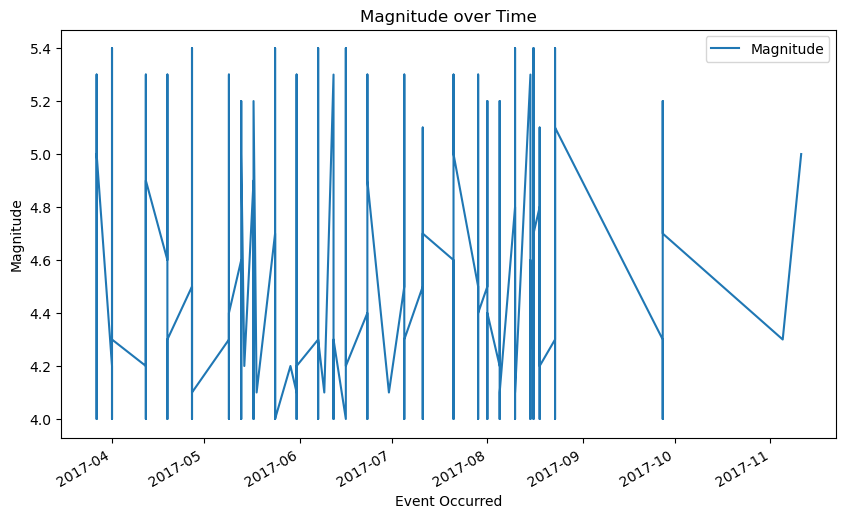

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


df.set_index('Event_Occured', inplace=True)


df.plot(kind='line', y='Magnitude', figsize=(10, 6), title='Magnitude over Time')
plt.xlabel('Event Occurred')
plt.ylabel('Magnitude')
plt.show()
